In [1]:
!pip install pycaret
!pip install shap


     |████████████████████████████████| 264 kB 12.2 MB/s 
     |████████████████████████████████| 108 kB 30.7 MB/s 
     |████████████████████████████████| 248 kB 44.9 MB/s 
     |████████████████████████████████| 80 kB 9.4 MB/s 
     |████████████████████████████████| 14.6 MB 83 kB/s 
     |████████████████████████████████| 271 kB 49.7 MB/s 
     |████████████████████████████████| 56 kB 5.1 MB/s 
     |████████████████████████████████| 6.8 MB 42.0 MB/s 
     |████████████████████████████████| 1.7 MB 33.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 167 kB 46.4 MB/s 
     |████████████████████████████████| 1.3 MB 53.6 MB/s 
     |████████████████████████████████| 2.0 MB 41.0 MB/s 
     |████████████████████████████████| 675 kB 49.9 MB/s 
     |████████████████████████████████| 102 kB 51.6 MB/s 
     |██████████████████

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from datetime import date


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [4]:
df = pd.read_excel("/content/drive/MyDrive/동일건축 /0823_J.xlsx") 
df.drop(["Unnamed: 0"], axis =1 , inplace = True)
df

G2BNumTxt    BidStartDateTime  ...   CorpRatio       C/P
0     20120612230 2012-06-14 09:00:00  ...  100.317525  1.000293
1     20120613986 2012-06-25 09:00:00  ...   98.363508  0.991768
2     20120626429 2012-07-02 10:30:00  ...  101.455236  0.989548
3     20120626457 2012-07-03 09:00:00  ...  100.687500  1.006598
4     20120629711 2012-07-05 09:00:00  ...   99.522506  0.994810
...           ...                 ...  ...         ...       ...
2731  20210708732 2021-07-15 10:00:00  ...   99.500022  0.989395
2732  20210709335 2021-07-15 10:00:00  ...  100.126347  0.991368
2733  20210709411 2021-07-16 10:00:00  ...   98.800249  0.984528
2734  20210711768 2021-07-20 10:00:00  ...  100.260883  1.002230
2735  20210712781 2021-07-21 10:00:00  ...   99.670513  0.996363

[2736 rows x 20 columns]

# 이전에 낙찰 받은 회사의 사정률을 새로운 변수 추가 

In [5]:
# 개찰 결과의 날로 오름차순으로 정렬한뒤 하나씩 shift 해서 새로운 칼럼에 추가 
df= df.sort_values(by=['BidOpenDateTime'], ascending=[True])
df['CorpRatio_lag'] = df.groupby('OrderOrgCode')['CorpRatio'].shift(1)


In [6]:
# 그룹별 평균으로 결측치 채우기 // null 값 73개가 있었는데 발주청 별 사정률로 채움 
df['CorpRatio_lag'] = df['CorpRatio'].fillna(df.groupby('OrderOrgCode')['CorpRatio'].transform('mean')) 
df.head(30)


G2BNumTxt        BidStartDateTime  ...       C/P CorpRatio_lag
0   20120612230 2012-06-14 09:00:00.000  ...  1.000293    100.317525
1   20120613986 2012-06-25 09:00:00.000  ...  0.991768     98.363508
2   20120626429 2012-07-02 10:30:00.000  ...  0.989548    101.455236
3   20120626457 2012-07-03 09:00:00.000  ...  1.006598    100.687500
4   20120629711 2012-07-05 09:00:00.000  ...  0.994810     99.522506
5   20120632367 2012-06-29 16:00:00.000  ...  1.013830    101.407593
6   20120632471 2012-07-10 09:00:00.000  ...  0.997725     99.779995
8   20120704196 2012-07-12 13:00:00.000  ...  1.006740    100.709820
7   20120703489 2012-07-12 10:00:00.000  ...  1.002908    100.301548
10  20120706827 2012-07-16 13:00:00.000  ...  1.021713     98.972185
12  20120708290 2012-07-17 13:00:00.000  ...  0.984913     98.555825
11  20120707105 2012-07-17 10:00:00.000  ...  0.993320     99.343914
13  20120709772 2012-07-18 13:00:00.000  ...  0.986405     98.661574
9   20120706522 2012-07-19 10:00:00.000  ...  0.998000     99.847648
14  20120710254 2012-07-19 10:00:00.000  ...  1.019038    102.049895
15  20120714802 2012-07-24 13:00:00.000  ...  1.013688     99.997093
16  20120715015 2012-07-26 14:40:00.000  ...  0.987935     98.811851
17  20120716565 2012-07-27 10:00:00.000  ...  0.996018     99.620000
18  20120717956 2012-08-01 09:00:00.000  ...  1.005208     99.861500
19  20120718944 2012-08-02 10:00:00.000  ...  1.004305    100.462007
21  20120724386 2012-08-06 09:59:59.995  ...  0.989058     98.271751
20  20120724351 2012-08-06 10:00:00.000  ...  0.998853     99.942606
22  20120726766 2012-08-10 13:00:00.000  ...  1.002690    100.275003
24  20120803025 2012-08-10 14:00:00.000  ...  1.000703    100.079999
23  20120802435 2012-08-13 10:00:00.000  ...  1.006878    100.039080
26  20120807997 2012-08-16 13:00:00.000  ...  1.011753    100.440003
25  20120807964 2012-08-21 10:00:00.000  ...  1.003025    100.310861
27  20120811677 2012-08-22 10:00:00.000  ...  0.993253     99.333777
28  20120811987 2012-08-24 14:00:00.000  ...  1.000660    100.073001
31  20120813646 2012-08-24 10:00:00.000  ...  0.995650     99.826012

[30 rows x 21 columns]


# 날짜  데이터






In [7]:

df['BidTime_y']=df['BidStartDateTime'].dt.year

In [8]:
#date.today().strftime('%Y%m%d')

df['BidStartDateTime_m'] = df['BidStartDateTime'].dt.strftime('%m')
df['BidStartDateTime_d'] = df['BidStartDateTime'].dt.strftime('%d')

df['BidEndDateTime_m'] = df['BidEndDateTime'].dt.strftime('%m')
df['BidEndDateTime_d'] = df['BidEndDateTime'].dt.strftime('%d')

df['BidOpenDateTime_m'] = df['BidOpenDateTime'].dt.strftime('%m')
df['BidOpenDateTime_d'] = df['BidOpenDateTime'].dt.strftime('%d')

df['BiddingDateTime_m'] = df['BiddingDateTime'].dt.strftime('%m')
df['BiddingDateTime_d'] = df['BiddingDateTime'].dt.strftime('%d')

In [9]:
df['BidStartDateTime_HR'] = df['BidStartDateTime'].dt.hour

df['BidEndDateTime_HR'] = df['BidEndDateTime'].dt.hour

df['BidOpenDateTime_HR'] = df['BidOpenDateTime'].dt.hour
df.drop(["BidStartDateTime", "BidEndDateTime", "BidOpenDateTime","BiddingDateTime"], axis =1 , inplace = True)
df.head(40)

G2BNumTxt  SupervisionConstCost  ...  BidEndDateTime_HR  BidOpenDateTime_HR
0   20120612230           51962242000  ...                 10                  11
1   20120613986           52655286000  ...                 10                  11
2   20120626429           50958014000  ...                 10                  11
3   20120626457          116602943000  ...                 10                  11
4   20120629711          231773056000  ...                 18                   9
5   20120632367           33870622000  ...                 10                  11
6   20120632471           52880351000  ...                 10                  11
8   20120704196           53225793000  ...                 18                  10
7   20120703489           22832766000  ...                 14                  15
10  20120706827           78855096000  ...                 18                  10
12  20120708290          158657518000  ...                 18                  19
11  20120707105           51450970000  ...                 16                  10
13  20120709772          104859255000  ...                 18                  10
9   20120706522          227762910000  ...                 10                  11
14  20120710254           37065697000  ...                 14                  15
15  20120714802           84328952000  ...                 18                  10
16  20120715015          133328302000  ...                 18                  10
17  20120716565           56259310000  ...                 13                  14
18  20120717956           34187840000  ...                 10                  11
19  20120718944           68508208000  ...                 10                  11
21  20120724386           65494115000  ...                 13                  14
20  20120724351           46549508000  ...                 13                  14
22  20120726766           62073743000  ...                 18                  10
24  20120803025          154446591000  ...                 10                  11
23  20120802435           63901948000  ...                 10                  11
26  20120807997          146579244000  ...                 18                  10
25  20120807964           24664723000  ...                 16                  10
27  20120811677           55291924000  ...                 13                  14
28  20120811987           21391797000  ...                 17                  10
31  20120813646           91120251000  ...                 13                  14
30  20120812915           71810117000  ...                 13                  14
29  20120812873           80539160000  ...                 13                  14
32  20120817421           31564965000  ...                 14                  15
33  20120821720          140215464000  ...                 12                  14
34  20120822867           35022408000  ...                 12                  13
35  20120824407          109946135000  ...                 10                  11
37  20120825926           37493060000  ...                 18                  10
36  20120825344           23059873000  ...                 15                  16
38  20120901515           95557710000  ...                 10                  11
39  20120903779           52745550000  ...                 17                  14

[40 rows x 29 columns]

In [10]:
df = df.astype({'BidTime_y': object})
df = df.astype({'BidStartDateTime_m': object})
df = df.astype({'BidStartDateTime_d': object})
df = df.astype({'BidEndDateTime_m': object})
df = df.astype({'BidEndDateTime_d': object})
df = df.astype({'BidOpenDateTime_m': object})
df = df.astype({'BidOpenDateTime_d': object})
df = df.astype({'BiddingDateTime_m': object})
df = df.astype({'BiddingDateTime_d': object})
df = df.astype({'BidStartDateTime_HR': object})
df = df.astype({'BidEndDateTime_HR': object})
df = df.astype({'BidOpenDateTime_HR': object})

df = df.astype({'IsVAT': object})
df = df.astype({'OrderOrgCode': object})
df = df.astype({'RegistNum': object})

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2736 entries, 0 to 2735
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   G2BNumTxt             2736 non-null   int64  
 1   SupervisionConstCost  2736 non-null   int64  
 2   BaseCost              2736 non-null   int64  
 3   IsVAT                 2736 non-null   object 
 4   BidLimitRatio         2736 non-null   float64
 5   HouseHold             2736 non-null   int64  
 6   GroundArea            2736 non-null   float64
 7   DrawedCount           2736 non-null   int64  
 8   OrderOrgCode          2736 non-null   object 
 9   Avetem                2736 non-null   float64
 10  Rainfall              2736 non-null   float64
 11  Avewind               2736 non-null   float64
 12  Avehum                2736 non-null   float64
 13  RegistNum             2736 non-null   object 
 14  CorpRatio             2736 non-null   float64
 15  C/P                  

In [12]:

# df.drop(["CorpRatio", "RegistNum"], axis =1 , inplace = True)

# df.to_excel(excel_writer='/content/drive/MyDrive/동일건축 /Final_data_0824.xlsx')

In [13]:
df_check = df[['SupervisionConstCost','BaseCost', 'BidLimitRatio', 'HouseHold', 'GroundArea', 'Avetem', 'Rainfall', 'Avewind', 'Avehum', "OrderOrgCode", "CorpRatio_lag", "C/P"]]


In [14]:
df_check.shape

(2736, 12)

In [15]:
data = df_check.sample(frac=0.9, random_state=786)
data_unseen = df_check.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (2462, 12)
Unseen Data For Predictions (274, 12)


# 환경설정 
setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column.




In [16]:
from pycaret.regression import *

In [17]:
df_check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2736 entries, 0 to 2735
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SupervisionConstCost  2736 non-null   int64  
 1   BaseCost              2736 non-null   int64  
 2   BidLimitRatio         2736 non-null   float64
 3   HouseHold             2736 non-null   int64  
 4   GroundArea            2736 non-null   float64
 5   Avetem                2736 non-null   float64
 6   Rainfall              2736 non-null   float64
 7   Avewind               2736 non-null   float64
 8   Avehum                2736 non-null   float64
 9   OrderOrgCode          2736 non-null   object 
 10  CorpRatio_lag         2736 non-null   float64
 11  C/P                   2736 non-null   float64
dtypes: float64(8), int64(3), object(1)
memory usage: 357.9+ KB


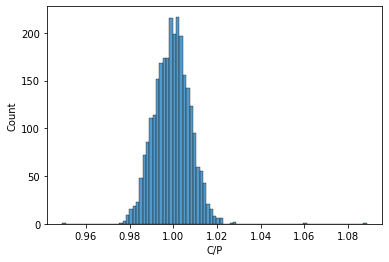

In [18]:
sns.histplot(x = df_check["C/P"])

In [19]:
# Normalization, Transformation, Target_Transformation, Remove Multicollinearity (threshold = 0.95)를 하여 모델 Setup
df_reg = setup(data = df_check,
               target = 'C/P',
               session_id = 123,
               normalize = True,
               transformation = True,
               transform_target = True,
               remove_multicollinearity = True,
               multicollinearity_threshold = 0.95)

Description             Value
0                               session_id               123
1                                   Target               C/P
2                            Original Data        (2736, 12)
3                           Missing Values             False
4                         Numeric Features                10
5                     Categorical Features                 1
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set        (1915, 80)
10                    Transformed Test Set         (821, 80)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU             False
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              510c
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize              True
28                        Normalize Method            zscore
29                          Transformation              True
30                   Transformation Method       yeo-johnson
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity              True
41             Multicollinearity Threshold              0.95
42             Remove Perfect Collinearity              True
43                              Clustering             False
44                    Clustering Iteration              None
45                     Polynomial Features             False
46                       Polynomial Degree              None
47                    Trignometry Features             False
48                    Polynomial Threshold              None
49                          Group Features             False
50                       Feature Selection             False
51                Feature Selection Method           classic
52            Features Selection Threshold              None
53                     Feature Interaction             False
54                           Feature Ratio             False
55                   Interaction Threshold              None
56                        Transform Target              True
57                 Transform Target Method           box-cox



**Original Data :** 
Displays the original shape of dataset. (레코드 개수, 피쳐수 )데이터의 원래 모양

---

**Missing Values :** 
결측치 있으면 True! 숫자 값에는 평균 대입기를 사용하고 numeric_imputation 범주형에는 상수 대입기를 사용 categorical_imputation

---

**Combine Rare Levels:**
데이터 세트에서 Clarity 기능의 분포를 확인. 그것은 "FL"이 4번만 나타나는 7개의 별개의 클래스를 가지고 있음. 유사하게 "Cut" 기능에서 "Fair" 수준은 훈련 데이터 세트의 시간의 2.1%만 나타남. 설정에서 Combine_rare_categories 매개변수를 사용하여 희귀 레벨을 결합.

---

**Data Scale / Range:**
캐럿 중량의 스케일/범위가 가격 변수와 어떻게 크게 다른지 확인. 캐럿 무게 범위는 0.75에서 2.91 사이이고 가격 범위는 2,184에서 최대 101,561 따라서 설정에서 normalize 매개변수를 사용하여 이 문제를 처리.

---

**Numeric Features :** 
Number of features inferred as numeric. In this dataset, 1 out of 8 features are inferred as numeric. 숫자로 추론된 피쳐수 8개 피쳐로 하나 

---

**Categorical Features :** 
Number of features inferred as categorical. In this dataset, 6 out of 8 features are inferred as categorical.
범주형으로 추론된 피쳐 수입니다. 이 데이터 집합에서 8개 중 6개의 기능이 범주형으로 추론됩니다

---

**Transformed Train Set :** 
Displays the shape of the transformed training set. Notice that the original shape of (5400, 8) is transformed into (3779, 28) for the transformed train set. The number of features has increased from 8 from 28 due to categorical encoding

---

**Transformed Test Set :** 
Displays the shape of transformed test/hold-out set. There are 1621 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using train_size parameter in setup.


---
**Bin Numeric Features:**
캐럿 무게는 유일한 숫자 기능. 히스토그램을 보면 분포가 자연스럽게 끊어진 것처럼 보임. Binning은 이를 범주형 기능으로 변환하고 스터지스 규칙을 사용하여 여러 수준을 만듦. 이것은 선형 알고리즘의 노이즈를 제거하는 데 도움이 됨.


In [20]:
# 다중공선성에 의해 제거된 변수 버린 후 나온 결과 
get_config('X')

BaseCost  BidLimitRatio  ...  OrderOrgCode_충청남도  OrderOrgCode_충청북도
0    -1.073016       0.990647  ...                0.0                1.0
1    -1.051658       0.041992  ...                0.0                0.0
2    -1.104134       0.990647  ...                0.0                0.0
3     0.394076      -1.438018  ...                0.0                0.0
4     1.429289      -1.438018  ...                0.0                0.0
...        ...            ...  ...                ...                ...
2732  0.125154       0.041992  ...                0.0                1.0
2729  0.257163       0.041992  ...                0.0                0.0
2733  0.780551       0.041992  ...                0.0                0.0
2734 -0.571745       0.041992  ...                0.0                0.0
2735  0.495958       0.041992  ...                0.0                0.0

[2736 rows x 80 columns]

In [21]:
top3 = compare_models(exclude = ['ransac'], n_select=3)

Model     MAE     MSE    RMSE      R2  \
gbr           Gradient Boosting Regressor  0.0028  0.0000  0.0050  0.6144   
rf                Random Forest Regressor  0.0029  0.0000  0.0051  0.5962   
lightgbm  Light Gradient Boosting Machine  0.0031  0.0000  0.0051  0.5875   
et                  Extra Trees Regressor  0.0031  0.0000  0.0052  0.5773   
ada                    AdaBoost Regressor  0.0046  0.0000  0.0061  0.4228   
dt                Decision Tree Regressor  0.0038  0.0000  0.0068  0.2713   
knn                 K Neighbors Regressor  0.0056  0.0001  0.0072  0.2006   
lasso                    Lasso Regression  0.0063  0.0001  0.0080 -0.0032   
en                            Elastic Net  0.0063  0.0001  0.0080 -0.0032   
llar         Lasso Least Angle Regression  0.0063  0.0001  0.0080 -0.0032   
br                         Bayesian Ridge  0.0060  0.0001  0.0080 -0.0056   
omp           Orthogonal Matching Pursuit  0.0060  0.0001  0.0081 -0.0399   
ridge                    Ridge Regression  0.0061  0.0001  0.0082 -0.0542   
lar                Least Angle Regression  0.0061  0.0001  0.0082 -0.0677   

           RMSLE    MAPE  TT (Sec)  
gbr       0.0025  0.0028     0.378  
rf        0.0025  0.0029     1.509  
lightgbm  0.0026  0.0031     0.166  
et        0.0026  0.0031     1.356  
ada       0.0030  0.0046     0.176  
dt        0.0034  0.0038     0.042  
knn       0.0036  0.0056     0.346  
lasso     0.0040  0.0064     0.290  
en        0.0040  0.0064     0.025  
llar      0.0040  0.0064     0.023  
br        0.0040  0.0060     0.034  
omp       0.0041  0.0060     0.024  
ridge     0.0041  0.0061     0.023  
lar       0.0041  0.0061     0.044

모델 라이브러리의 모든 모델을 훈련하고 메트릭 평가를 위해 k-겹 교차 검증을 사용하여 점수를 매깁니다. 출력은 훈련 시간과 함께 폴드(기본적으로 10개)에 걸쳐 평균 MAE, MSE, RMSE, R2, RMSLE 및 MAPE를 표시

In [22]:
models()

Name  ...  Turbo
ID                                           ...       
lr                        Linear Regression  ...   True
lasso                      Lasso Regression  ...   True
ridge                      Ridge Regression  ...   True
en                              Elastic Net  ...   True
lar                  Least Angle Regression  ...   True
llar           Lasso Least Angle Regression  ...   True
omp             Orthogonal Matching Pursuit  ...   True
br                           Bayesian Ridge  ...   True
ard       Automatic Relevance Determination  ...  False
par            Passive Aggressive Regressor  ...   True
ransac              Random Sample Consensus  ...  False
tr                       TheilSen Regressor  ...  False
huber                       Huber Regressor  ...   True
kr                             Kernel Ridge  ...  False
svm               Support Vector Regression  ...  False
knn                   K Neighbors Regressor  ...   True
dt                  Decision Tree Regressor  ...   True
rf                  Random Forest Regressor  ...   True
et                    Extra Trees Regressor  ...   True
ada                      AdaBoost Regressor  ...   True
gbr             Gradient Boosting Regressor  ...   True
mlp                           MLP Regressor  ...  False
lightgbm    Light Gradient Boosting Machine  ...   True

[23 rows x 3 columns]

In [23]:
# default hyperparameters 사용, 10 Fold CV
lightgbm = create_model('lightgbm')

MAE  MSE    RMSE      R2   RMSLE    MAPE
0     0.0031  0.0  0.0059  0.5724  0.0029  0.0031
1     0.0025  0.0  0.0039  0.7512  0.0020  0.0025
2     0.0031  0.0  0.0046  0.6115  0.0023  0.0031
3     0.0030  0.0  0.0050  0.5930  0.0025  0.0030
4     0.0035  0.0  0.0054  0.5761  0.0027  0.0035
5     0.0034  0.0  0.0057  0.5046  0.0028  0.0034
6     0.0037  0.0  0.0070  0.4187  0.0035  0.0037
7     0.0028  0.0  0.0046  0.6308  0.0023  0.0028
8     0.0029  0.0  0.0043  0.6689  0.0021  0.0029
9     0.0033  0.0  0.0051  0.5480  0.0026  0.0033
Mean  0.0031  0.0  0.0051  0.5875  0.0026  0.0031
SD    0.0003  0.0  0.0008  0.0855  0.0004  0.0003

In [24]:
rf = create_model('rf')

MAE  MSE    RMSE      R2   RMSLE    MAPE
0     0.0029  0.0  0.0059  0.5672  0.0030  0.0028
1     0.0022  0.0  0.0038  0.7677  0.0019  0.0022
2     0.0027  0.0  0.0042  0.6793  0.0021  0.0027
3     0.0029  0.0  0.0049  0.6072  0.0024  0.0029
4     0.0031  0.0  0.0052  0.5962  0.0026  0.0031
5     0.0033  0.0  0.0060  0.4504  0.0030  0.0033
6     0.0033  0.0  0.0071  0.4013  0.0035  0.0033
7     0.0026  0.0  0.0047  0.6192  0.0023  0.0026
8     0.0026  0.0  0.0042  0.6799  0.0021  0.0026
9     0.0030  0.0  0.0049  0.5937  0.0024  0.0030
Mean  0.0029  0.0  0.0051  0.5962  0.0025  0.0029
SD    0.0003  0.0  0.0009  0.1020  0.0005  0.0003

In [25]:
gbr = create_model('gbr')

MAE  MSE    RMSE      R2   RMSLE    MAPE
0     0.0029  0.0  0.0060  0.5625  0.0030  0.0029
1     0.0023  0.0  0.0038  0.7664  0.0019  0.0023
2     0.0026  0.0  0.0042  0.6801  0.0021  0.0026
3     0.0027  0.0  0.0047  0.6346  0.0024  0.0027
4     0.0031  0.0  0.0049  0.6515  0.0024  0.0031
5     0.0033  0.0  0.0059  0.4611  0.0030  0.0033
6     0.0031  0.0  0.0069  0.4305  0.0035  0.0031
7     0.0025  0.0  0.0045  0.6423  0.0023  0.0025
8     0.0023  0.0  0.0039  0.7226  0.0020  0.0023
9     0.0029  0.0  0.0049  0.5923  0.0024  0.0029
Mean  0.0028  0.0  0.0050  0.6144  0.0025  0.0028
SD    0.0003  0.0  0.0009  0.1011  0.0005  0.0003

In [26]:
print("lightgbm: ",lightgbm)
print("rf: ", rf)
print("gbr: ",gbr)

lightgbm:  PowerTransformedTargetRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=1...
                                                        importance_type='split',
                                                        learning_rate=0.1,
                                                        max_depth=-1,
                                                        min_child_samples=20,
                                                        min_

# Tune a Model

하이퍼파라미터를 조정하기 위해 tune_model 함수를 사용
 이 기능은 미리 정의된 검색 공간에서 Random Grid Search를 사용하여 모델의 하이퍼파라미터를 자동으로 조정


내가 지정한 hyperparameters 사용 

In [27]:
gbr_params = {'n_estimators': np.arange(100,400,10),
              'max_depth': [int(x) for x in np.linspace(1, 20, num = 15)],
              'learning_rate': np.arange(0.1,1,0.1),
              'min_samples_leaf' : [int(x) for x in np.linspace(1, 20, num = 15)],
              'min_samples_split' : [int(x) for x in np.linspace(1, 20, num = 15)]}

In [28]:
#R^2를최적화 매개변수로 사용 가장 높은 R2를 생성하는 회귀모델의 하이퍼파라미터를 검색
tuned_gbr = tune_model(gbr, custom_grid = gbr_params)

MAE  MSE    RMSE      R2   RMSLE    MAPE
0     0.0029  0.0  0.0059  0.5748  0.0029  0.0029
1     0.0022  0.0  0.0036  0.7951  0.0018  0.0022
2     0.0026  0.0  0.0042  0.6778  0.0021  0.0026
3     0.0028  0.0  0.0049  0.6070  0.0024  0.0028
4     0.0032  0.0  0.0052  0.6005  0.0026  0.0032
5     0.0033  0.0  0.0058  0.4868  0.0029  0.0033
6     0.0032  0.0  0.0068  0.4368  0.0034  0.0032
7     0.0026  0.0  0.0046  0.6321  0.0023  0.0026
8     0.0025  0.0  0.0040  0.7103  0.0020  0.0025
9     0.0030  0.0  0.0050  0.5634  0.0025  0.0030
Mean  0.0028  0.0  0.0050  0.6085  0.0025  0.0028
SD    0.0003  0.0  0.0009  0.0990  0.0005  0.0003

In [29]:
lgbm_params = {
     'num_leaves': np.arange(10,200,10),
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
    'learning_rate': np.arange(0.1,1,0.1)}

In [30]:
#R^2를최적화 매개변수로 사용 가장 높은 R2를 생성하는 회귀모델의 하이퍼파라미터를 검색
tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)

MAE  MSE    RMSE      R2   RMSLE    MAPE
0     0.0033  0.0  0.0060  0.5531  0.0030  0.0032
1     0.0026  0.0  0.0040  0.7419  0.0020  0.0026
2     0.0031  0.0  0.0046  0.6020  0.0023  0.0032
3     0.0030  0.0  0.0050  0.5787  0.0025  0.0030
4     0.0035  0.0  0.0053  0.5812  0.0027  0.0035
5     0.0036  0.0  0.0058  0.4827  0.0029  0.0036
6     0.0037  0.0  0.0070  0.4094  0.0035  0.0037
7     0.0030  0.0  0.0049  0.5927  0.0024  0.0030
8     0.0030  0.0  0.0043  0.6583  0.0022  0.0030
9     0.0035  0.0  0.0053  0.5250  0.0026  0.0035
Mean  0.0032  0.0  0.0052  0.5725  0.0026  0.0032
SD    0.0003  0.0  0.0008  0.0865  0.0004  0.0003

In [31]:
rf_params = {'min_samples_leaf':[int(x) for x in np.linspace(6, 20, num = 2)],
                        'max_depth': [int(x) for x in np.linspace(6, 12, num = 2)],
                        'min_samples_split': [int(x) for x in np.linspace(10, 20, num = 2)]
                        }


In [32]:
 tuned_rf = tune_model(rf, custom_grid = rf_params)

MAE  MSE    RMSE      R2   RMSLE    MAPE
0     0.0028  0.0  0.0058  0.5869  0.0029  0.0028
1     0.0022  0.0  0.0035  0.8020  0.0018  0.0022
2     0.0026  0.0  0.0041  0.6848  0.0021  0.0026
3     0.0028  0.0  0.0049  0.6042  0.0024  0.0028
4     0.0030  0.0  0.0050  0.6372  0.0025  0.0030
5     0.0031  0.0  0.0055  0.5260  0.0028  0.0031
6     0.0032  0.0  0.0069  0.4260  0.0035  0.0032
7     0.0025  0.0  0.0046  0.6390  0.0023  0.0025
8     0.0023  0.0  0.0038  0.7367  0.0019  0.0023
9     0.0029  0.0  0.0048  0.5972  0.0024  0.0029
Mean  0.0027  0.0  0.0049  0.6240  0.0024  0.0027
SD    0.0003  0.0  0.0010  0.0999  0.0005  0.0003


---
**회귀 Error 확인 다양한 방법**


https://www.dataquest.io/blog/understanding-regression-error-metrics/ 
---
**finalizing the best model**

고려해야 할 다른 요소로는 훈련 시간, k-폴드의 표준 편차 등 존재 


# Plot Model
plot_model() 함수를 사용하여 잔차 플롯, 예측 오류, 특징 중요도 등과 같은 다양한 측면에서 성능을 분석할 수 있습니다

In [34]:
plt.rc('font',family='Malgun Gothic')

In [33]:
# 모델의 성능 분석할 때 쓰는 다양한 Plot 모델들 
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

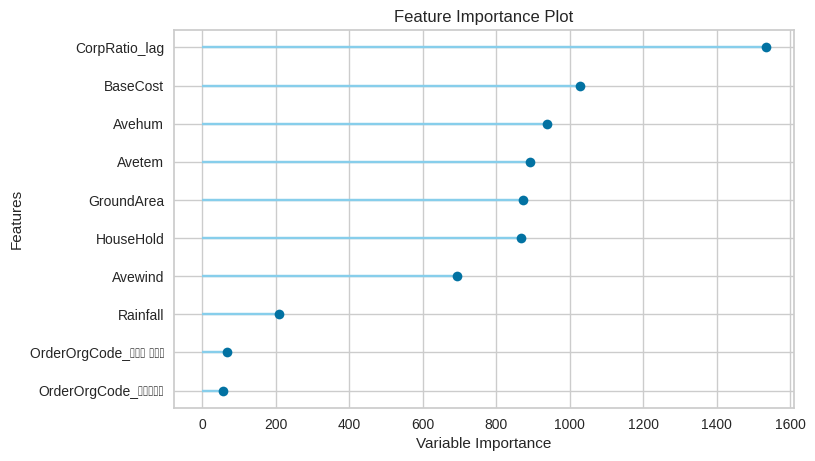

In [39]:
plot_model(tuned_lightgbm, plot='feature')

# Tuning_2

n_iter 매개변수를 소개합니다. n_iter는 랜덤 그리드 검색 내 반복 횟수입니다. 모든 반복에 대해 모델은 미리 정의된 하이퍼파라미터 그리드에서 하나의 값을 무작위로 선택합니다. 기본적으로 매개변수는 10으로 설정되며, 이는 하이퍼파라미터에 대한 최상의 값을 찾기 위해 최대 10번의 반복이 있음을 의미합니다. 값을 높이면 성능이 향상되지만 훈련 시간도 늘어납니다.

In [35]:
tuned_lightgbm2 = tune_model(lightgbm, n_iter = 50)

MAE  MSE    RMSE      R2   RMSLE    MAPE
0     0.0032  0.0  0.0060  0.5603  0.0030  0.0032
1     0.0024  0.0  0.0037  0.7861  0.0018  0.0024
2     0.0027  0.0  0.0043  0.6594  0.0021  0.0027
3     0.0028  0.0  0.0049  0.6039  0.0024  0.0028
4     0.0033  0.0  0.0050  0.6257  0.0025  0.0033
5     0.0032  0.0  0.0056  0.5154  0.0028  0.0032
6     0.0033  0.0  0.0068  0.4461  0.0034  0.0034
7     0.0027  0.0  0.0046  0.6313  0.0023  0.0027
8     0.0027  0.0  0.0040  0.7124  0.0020  0.0026
9     0.0030  0.0  0.0052  0.5354  0.0026  0.0030
Mean  0.0029  0.0  0.0050  0.6076  0.0025  0.0029
SD    0.0003  0.0  0.0009  0.0941  0.0005  0.0003

In [36]:
tuned_rf2 = tune_model(rf, n_iter = 15)

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.0043  0.0000  0.0068  0.4382  0.0034  0.0043
1     0.0034  0.0000  0.0048  0.6322  0.0024  0.0034
2     0.0036  0.0000  0.0049  0.5586  0.0024  0.0036
3     0.0034  0.0000  0.0052  0.5567  0.0026  0.0034
4     0.0041  0.0000  0.0056  0.5421  0.0028  0.0041
5     0.0042  0.0000  0.0060  0.4412  0.0030  0.0042
6     0.0048  0.0001  0.0075  0.3211  0.0038  0.0048
7     0.0038  0.0000  0.0054  0.4899  0.0027  0.0038
8     0.0038  0.0000  0.0049  0.5579  0.0025  0.0038
9     0.0037  0.0000  0.0054  0.4960  0.0027  0.0037
Mean  0.0039  0.0000  0.0057  0.5034  0.0028  0.0039
SD    0.0004  0.0000  0.0008  0.0828  0.0004  0.0004

# Ensemble a Model

앙상블은 모델의 성능을 향상시키는 데 사용되는 일반적인 기계 학습 기술임.(대부분 트리 기반) 다양한 앙상블 기법이 있습니다. 여기에는 배깅(Bagging) 및 부스팅(Boosting)이 포함됨. PyCaret의 ensemble_model() 함수를 사용하여 메서드 매개변수에 정의된 메서드를 사용하여 훈련된 기본 추정기를 앙상블함

In [37]:
# Bagging
bagged_lightgbm = ensemble_model(lightgbm)

MAE  MSE    RMSE      R2   RMSLE    MAPE
0     0.0031  0.0  0.0059  0.5804  0.0029  0.0030
1     0.0024  0.0  0.0038  0.7700  0.0019  0.0024
2     0.0030  0.0  0.0045  0.6236  0.0023  0.0030
3     0.0028  0.0  0.0049  0.6011  0.0025  0.0028
4     0.0033  0.0  0.0052  0.6006  0.0026  0.0033
5     0.0033  0.0  0.0056  0.5174  0.0028  0.0033
6     0.0034  0.0  0.0067  0.4536  0.0034  0.0034
7     0.0027  0.0  0.0046  0.6335  0.0023  0.0027
8     0.0025  0.0  0.0040  0.7116  0.0020  0.0025
9     0.0032  0.0  0.0051  0.5551  0.0025  0.0032
Mean  0.0030  0.0  0.0050  0.6047  0.0025  0.0030
SD    0.0003  0.0  0.0008  0.0857  0.0004  0.0003

In [38]:
# Boosting, default build 10 estimators
boosted_lightgbm = ensemble_model(lightgbm, method = 'Boosting')

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.0034  0.0000  0.0061  0.5508  0.0030  0.0034
1     0.0026  0.0000  0.0038  0.7644  0.0019  0.0026
2     0.0032  0.0000  0.0045  0.6264  0.0022  0.0032
3     0.0032  0.0000  0.0052  0.5553  0.0026  0.0032
4     0.0037  0.0000  0.0056  0.5471  0.0028  0.0037
5     0.0037  0.0000  0.0061  0.4314  0.0030  0.0038
6     0.0039  0.0001  0.0071  0.3931  0.0036  0.0039
7     0.0030  0.0000  0.0047  0.6116  0.0024  0.0030
8     0.0029  0.0000  0.0041  0.6962  0.0020  0.0029
9     0.0035  0.0000  0.0051  0.5526  0.0026  0.0035
Mean  0.0033  0.0000  0.0052  0.5729  0.0026  0.0033
SD    0.0004  0.0000  0.0010  0.1051  0.0005  0.0004

In [39]:
#using the n_estimators parameter. Increasing the number of estimators can sometimes improve results
bagged_lightgbm2 = ensemble_model(lightgbm, n_estimators=50)

MAE  MSE    RMSE      R2   RMSLE    MAPE
0     0.0030  0.0  0.0058  0.5815  0.0029  0.0030
1     0.0023  0.0  0.0037  0.7768  0.0019  0.0023
2     0.0029  0.0  0.0044  0.6479  0.0022  0.0029
3     0.0028  0.0  0.0049  0.6059  0.0024  0.0028
4     0.0032  0.0  0.0051  0.6183  0.0026  0.0032
5     0.0033  0.0  0.0056  0.5224  0.0028  0.0033
6     0.0034  0.0  0.0068  0.4438  0.0034  0.0034
7     0.0027  0.0  0.0046  0.6357  0.0023  0.0027
8     0.0026  0.0  0.0040  0.7144  0.0020  0.0026
9     0.0031  0.0  0.0050  0.5752  0.0025  0.0031
Mean  0.0029  0.0  0.0050  0.6122  0.0025  0.0029
SD    0.0003  0.0  0.0009  0.0884  0.0004  0.0003

In [40]:
# blend top3 models from compare_models
blender_top3 = blend_models(top3)

MAE  MSE    RMSE      R2   RMSLE    MAPE
0     0.0029  0.0  0.0059  0.5804  0.0029  0.0028
1     0.0022  0.0  0.0037  0.7826  0.0018  0.0022
2     0.0027  0.0  0.0042  0.6758  0.0021  0.0027
3     0.0027  0.0  0.0047  0.6295  0.0024  0.0027
4     0.0031  0.0  0.0050  0.6270  0.0025  0.0031
5     0.0032  0.0  0.0057  0.4943  0.0029  0.0032
6     0.0033  0.0  0.0069  0.4317  0.0035  0.0033
7     0.0025  0.0  0.0045  0.6490  0.0023  0.0025
8     0.0025  0.0  0.0039  0.7224  0.0020  0.0025
9     0.0029  0.0  0.0048  0.6045  0.0024  0.0029
Mean  0.0028  0.0  0.0049  0.6197  0.0025  0.0028
SD    0.0003  0.0  0.0009  0.0970  0.0005  0.0003

# Predict on Test
모델을 완성하기 전에 테스트/홀드아웃 세트를 예측하고 평가 지표를 검토하여 최종 확인을 한 번 수행하는 것이 좋음
-> 데이터를 Training, Test로 나눠서 모델링하고 평가하는 것임
-> overfitting 방지 

이제 tuned_lightgbm 변수에 저장된 최종 훈련된 모델을 사용하여 홀드아웃 샘플을 예측하고 메트릭을 평가하여 CV 결과와 실질적으로 다른지 확인

In [46]:
predict_model(tuned_lightgbm);

Model     MAE  MSE    RMSE      R2   RMSLE    MAPE
0  Light Gradient Boosting Machine  0.0033  0.0  0.0058  0.5615  0.0029  0.0033

위의 tuned_lightgbm CV results : 0.5771

test/hold-out set : 0.5605

-> Overfitting 없음

마지막으로 모델을 마무리하고 unseen data(처음에 분리했고 PyCaret에 노출되지 않은 10%)에 대한 예측을 진행


**TIP : create_model을 사용할 때 CV 결과의 표준편차를 항상 살펴보는 것이 좋음**

In [47]:
print("<<Custom으로 하이퍼파라미터 조정해서 Train한 모델>>")
predict_model(tuned_lightgbm);
predict_model(tuned_gbr);
predict_model(tuned_rf);

print(" \n\n\n<<Random Grid Search로 하이퍼파라미터에 대한 최상의 값을 찾기 위해 50번 반복시켜 Train한 모델>>")
predict_model(tuned_lightgbm2);
predict_model(tuned_rf2);

print("\n\n\n<<Blender모델로 Train한 모델>>")
predict_model(blender_top3);

<<Custom으로 하이퍼파라미터 조정해서 Train한 모델>>


Model     MAE  MSE    RMSE      R2   RMSLE    MAPE
0  Light Gradient Boosting Machine  0.0033  0.0  0.0058  0.5615  0.0029  0.0033

Model     MAE  MSE    RMSE      R2   RMSLE    MAPE
0  Gradient Boosting Regressor  0.0029  0.0  0.0055  0.5976  0.0027  0.0029

Model     MAE  MSE    RMSE      R2   RMSLE    MAPE
0  Random Forest Regressor  0.0029  0.0  0.0055  0.5938  0.0028  0.0029

 


<<Random Grid Search로 하이퍼파라미터에 대한 최상의 값을 찾기 위해 50번 반복시켜 Train한 모델>>


Model    MAE  MSE    RMSE      R2   RMSLE   MAPE
0  Light Gradient Boosting Machine  0.003  0.0  0.0055  0.5955  0.0027  0.003

Model     MAE  MSE    RMSE      R2   RMSLE    MAPE
0  Random Forest Regressor  0.0039  0.0  0.0062  0.4988  0.0031  0.0039




<<Blender모델로 Train한 모델>>


Model    MAE  MSE    RMSE     R2   RMSLE   MAPE
0  Voting Regressor  0.003  0.0  0.0056  0.585  0.0028  0.003

In [43]:
final_lightgbm = finalize_model(tuned_lightgbm)
final_gbr = finalize_model(tuned_gbr)
final_rf = finalize_model(tuned_rf)

final_lightgbm2 = finalize_model(tuned_lightgbm2)
final_rf2 = finalize_model(tuned_rf2)

final_blender_top3 = finalize_model(blender_top3)


In [44]:
print("<<Custom으로 하이퍼파라미터 조정해서 Train한 모델>>")
print(final_lightgbm)
print(final_gbr)
print(final_rf)

print(" \n\n\n<<Random Grid Search로 하이퍼파라미터에 대한 최상의 값을 찾기 위해 50번 반복시켜 Train한 모델>>")

print(final_lightgbm2)
print(final_rf2)


print("\n\n\n<<Blender모델로 Train한 모델>>")
print(final_blender_top3);


<<Custom으로 하이퍼파라미터 조정해서 Train한 모델>>
PowerTransformedTargetRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=60,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=120, objective=None,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=...
                                                        importance_type='split',
                                                        learning_rate=0.1,
                                                        max_depth=60,
                                                        min_child_samples=20,
                                   

주의: 마지막으로 주의할 부분

finalize_model()을 사용하여 모델이 완성되면 테스트/홀드아웃 세트를 포함한 전체 데이터 세트가 학습에 사용됨 따라서 finalize_model()이 사용된 후 홀드아웃 세트에 대한 예측에 모델이 사용되면 모델링에 사용된 동일한 데이터에 대해 예측하려고 하므로 인쇄된 정보 그리드가 오해의 소지가 있음. 
이 점만 보여주기 위해 predict_model() 아래에서 final_lightgbm을 사용하여 정보 그리드를 predict_model(tuned_lightgbm);의 결과값과 비교.

In [45]:
print("<<Custom으로 하이퍼파라미터 조정해서 Train한 모델>>")
predict_model(final_lightgbm);
predict_model(final_gbr);
predict_model(final_rf);

print(" \n\n\n<<Random Grid Search로 하이퍼파라미터에 대한 최상의 값을 찾기 위해 50번 반복시켜 Train한 모델>>")
predict_model(final_lightgbm2);
predict_model(final_rf2);

print("\n\n\n<<Blender모델로 Train한 모델>>")
predict_model(final_blender_top3);

<<Custom으로 하이퍼파라미터 조정해서 Train한 모델>>


Model     MAE  MSE   RMSE      R2   RMSLE    MAPE
0  Light Gradient Boosting Machine  0.0012  0.0  0.003  0.8811  0.0015  0.0011

Model     MAE  MSE   RMSE      R2   RMSLE    MAPE
0  Gradient Boosting Regressor  0.0026  0.0  0.005  0.6756  0.0025  0.0026

Model     MAE  MSE    RMSE      R2   RMSLE    MAPE
0  Random Forest Regressor  0.0022  0.0  0.0046  0.7208  0.0023  0.0022

 


<<Random Grid Search로 하이퍼파라미터에 대한 최상의 값을 찾기 위해 50번 반복시켜 Train한 모델>>


Model     MAE  MSE    RMSE      R2   RMSLE    MAPE
0  Light Gradient Boosting Machine  0.0028  0.0  0.0053  0.6225  0.0027  0.0028

Model     MAE  MSE    RMSE      R2   RMSLE    MAPE
0  Random Forest Regressor  0.0043  0.0  0.0063  0.4828  0.0031  0.0043




<<Blender모델로 Train한 모델>>


Model     MAE  MSE    RMSE      R2   RMSLE    MAPE
0  Voting Regressor  0.0017  0.0  0.0032  0.8605  0.0016  0.0017

모델이 동일하더라도 final_lightgbm의 R2가 0.5605에서 0.8919로 증가한 것을 확인 이는 final_lightgbm 변수가 테스트/홀드아웃 세트를 포함한 전체 데이터 세트에 대해 학습되었기 때문.

# Predict on Unseen Data

predict_model() 함수는 보이지 않는 데이터 세트를 예측하는 데에도 사용됨. 위의 섹션 *predict_model(tuned_lightgbm);* 과의 유일한 차이점은 이번에는 data_unseen 매개변수를 전달한다는 것

data_unseen은 튜토리얼 시작 부분에서 생성된 변수이며 PyCaret에 노출되지 않은 원본 데이터 세트의 10%(274개 샘플)를 포함. 

In [48]:
unseen_predictions_lightgbm = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions_gbr = predict_model(final_gbr, data=data_unseen)
unseen_predictions_rf = predict_model(final_rf, data=data_unseen)

unseen_predictions_lightgbm2 = predict_model(final_lightgbm2, data=data_unseen)
unseen_predictions_rf2 = predict_model(final_rf2, data=data_unseen)

unseen_predictions_blender_top3 = predict_model(final_blender_top3, data=data_unseen)

In [49]:
unseen_predictions_lightgbm.head(30)

SupervisionConstCost    BaseCost  ...       C/P     Label
0            33870622000   910811790  ...  1.013830  1.014014
1            51450970000  1191918866  ...  0.993320  0.993185
2           227762910000  5043832417  ...  0.998000  0.997501
3            56259310000  1300112146  ...  0.996018  0.996128
4            34187840000   871237442  ...  1.005208  1.004005
5           154446591000  3466176946  ...  1.000703  0.999570
6            80539160000  1838509622  ...  0.991680  0.991351
7            23059873000   684070325  ...  1.000585  1.001283
8           232655677000  5145412956  ...  1.003955  1.004690
9           136050872000  3060612928  ...  1.005290  1.004933
10           29982750000   782339895  ...  1.005145  1.004841
11           94361682000  2138800941  ...  0.993650  0.993595
12           18329920000   503761374  ...  0.994858  0.994069
13           46175993000  1096163124  ...  1.004975  1.005118
14          123771454000  2788796750  ...  1.017255  1.015650
15           49797482000  1155922376  ...  0.996268  0.996706
16          125576651000  2828413144  ...  0.995813  0.996446
17           85520076000  1946941500  ...  0.994823  0.994854
18           41713374000  1017213993  ...  1.000563  1.001116
19           58973564000  1360891654  ...  0.996175  0.996883
20           31587679000   816920324  ...  1.003478  1.003098
21           51191081000  1186018000  ...  0.997413  0.997275
22          451834240000  9817454366  ...  0.996920  0.996694
23           18956663000   520075347  ...  1.002828  1.001722
24          106625257000  2407768900  ...  0.990553  0.991571
25           39076031000   967985969  ...  0.998045  1.004592
26           27918206000   735781527  ...  1.006225  1.002232
27           75011412000  1717161265  ...  1.004160  1.003259
28          101532009000  2294272291  ...  1.015905  1.015271
29           23409938000   630289330  ...  0.994120  0.995185

[30 rows x 13 columns]

In [ ]:
unseen_predictions_lightgbm.rename(columns={'C/P' : 'CP'}, inplace = True)
unseen_predictions_gbr.rename(columns={'C/P' : 'CP'}, inplace = True)
unseen_predictions_rf.rename(columns={'C/P' : 'CP'}, inplace = True)

unseen_predictions_lightgbm2.rename(columns={'C/P' : 'CP'}, inplace = True)
unseen_predictions_rf2.rename(columns={'C/P' : 'CP'}, inplace = True)

unseen_predictions_blender_top3.rename(columns={'C/P' : 'CP'}, inplace = True)

In [98]:

from pycaret.utils import check_metric
Lightgbm = check_metric(unseen_predictions_lightgbm.CP, unseen_predictions_lightgbm.Label, 'R2')
Lightgbm2 = check_metric(unseen_predictions_lightgbm2.CP, unseen_predictions_lightgbm2.Label, 'R2')

gbr = check_metric(unseen_predictions_gbr.CP, unseen_predictions_gbr.Label, 'R2')

rf = check_metric(unseen_predictions_rf.CP, unseen_predictions_rf.Label, 'R2')
rf2 = check_metric(unseen_predictions_rf2.CP, unseen_predictions_rf2.Label, 'R2')

Blender= check_metric(unseen_predictions_blender_top3.CP, unseen_predictions_blender_top3.Label, 'R2')

In [100]:
print("LightGbm1 R^2_Custom: ",Lightgbm) 
#print("LightGbm R^2_RandomGrid: ",Lightgbm2)



print("Gbr R^2_Custom: ",gbr) 

print("RandomForest R^2_Custom: ",rf) 
#print("RandomForest R^2_RandomGrid: ",rf2)

print("Blender R^2 : ",Blender)

LightGbm1 R^2_Custom:  0.8021
Gbr R^2_Custom:  0.573
RandomForest R^2_Custom:  0.6074
Blender R^2 :  0.8264


In [79]:
light_df = unseen_predictions_lightgbm[['CP','Label']]
gbr_df = unseen_predictions_gbr[['CP','Label']]
rf_df = unseen_predictions_rf[['CP','Label']]


light_df2 = unseen_predictions_lightgbm2[['CP','Label']]
rf_df2 = unseen_predictions_rf2[['CP','Label']]


blender = unseen_predictions_blender_top3[['CP','Label']]

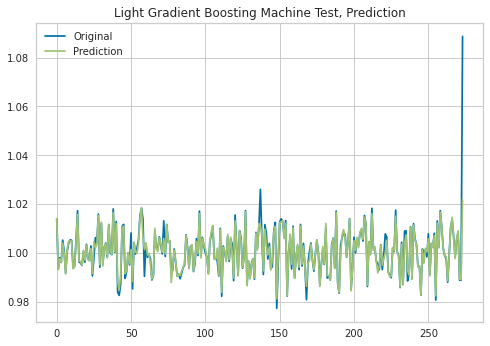

In [93]:

x_ax = range(len(new))
plt.plot(x_ax, light_df['CP'], label="Original")
plt.plot(x_ax, light_df["Label"], label="Prediction")
plt.legend()
plt.title("Light Gradient Boosting Machine Test, Prediction")
plt.show()

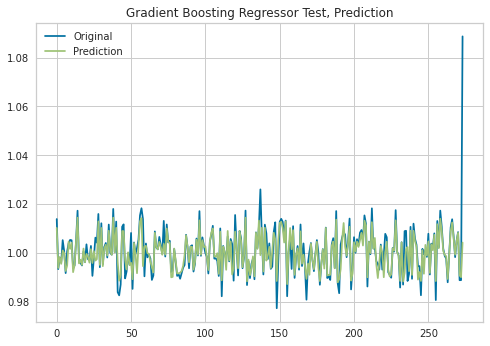

In [92]:

x_ax = range(len(new))
plt.plot(x_ax, gbr_df['CP'], label="Original")
plt.plot(x_ax, gbr_df["Label"], label="Prediction")
plt.legend()
plt.title("Gradient Boosting Regressor Test, Prediction")
plt.show()

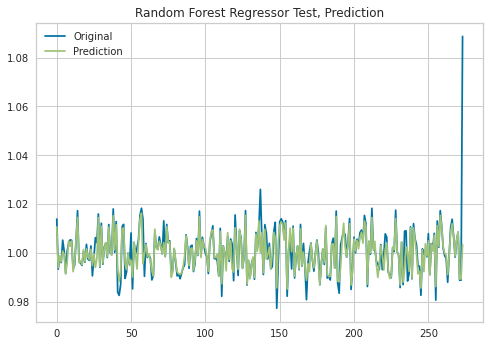

In [97]:
#new = new[:273]
x_ax = range(len(new))
plt.plot(x_ax, rf_df['CP'], label="Original")
plt.plot(x_ax, rf_df["Label"], label="Prediction")
plt.legend()
plt.title("Random Forest Regressor Test, Prediction")
plt.show()

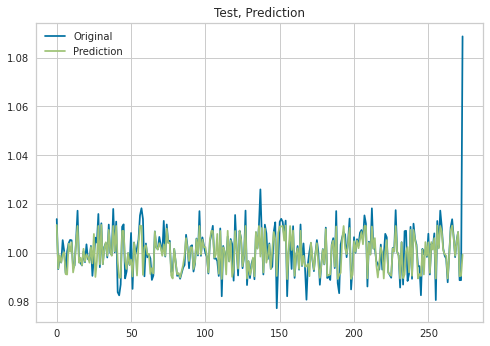

In [94]:

x_ax = range(len(new))
plt.plot(x_ax, light_df2['CP'], label="Original")
plt.plot(x_ax, light_df2["Label"], label="Prediction")
plt.legend()
plt.title("Test, Prediction")
plt.show()

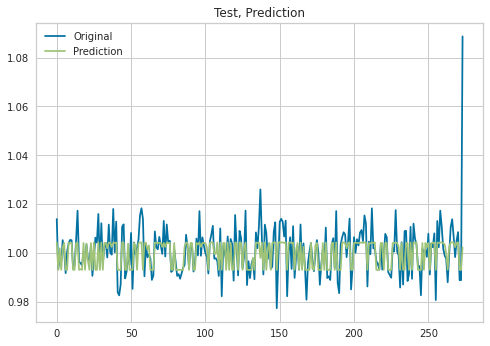

In [95]:

x_ax = range(len(new))
plt.plot(x_ax, rf_df2['CP'], label="Original")
plt.plot(x_ax, rf_df2["Label"], label="Prediction")
plt.legend()
plt.title("Test, Prediction")
plt.show()

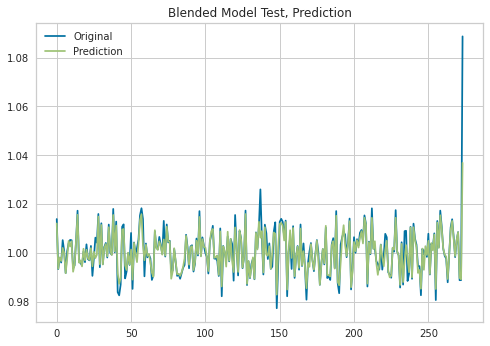

In [96]:
x_ax = range(len(new))
plt.plot(x_ax, blender['CP'], label="Original")
plt.plot(x_ax, blender["Label"], label="Prediction")
plt.legend()
plt.title("Blended Model Test, Prediction")
plt.show()

In [57]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [58]:
evaluate_model(final_lightgbm2)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

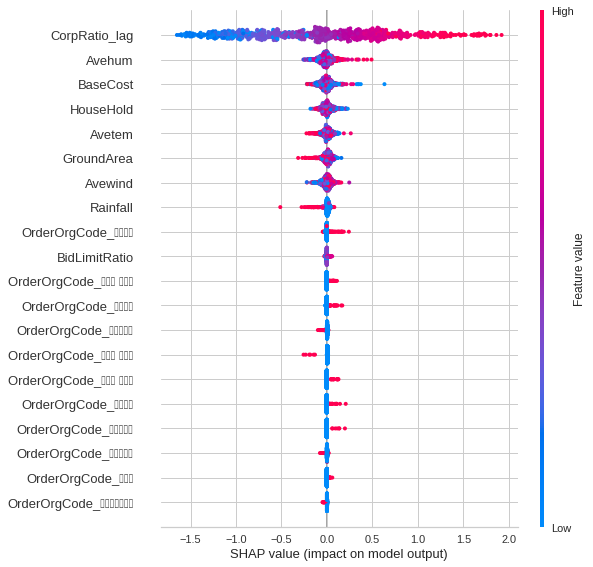

In [60]:
interpret_model(tuned_lightgbm)

In [103]:
save_model(final_lightgbm,'Final LightGBM Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='C/P',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='me...
                                                                          learning_rate=0.1,
                                                                          max_depth=60,
                                                                          min_child_samples=20,
                                    

In [104]:
save_model(final_blender_top3, "Final Blended Model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='C/P',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='me...
                                                                                                       importance_type='split',
                                                                                                       learning_rate=0.1,
                                                               

In [102]:
saved_final_lightgbm = load_model('Final LightGBM Model')

Transformation Pipeline and Model Successfully Loaded


In [105]:
data_unseen

SupervisionConstCost    BaseCost  ...  CorpRatio_lag       C/P
0             33870622000   910811790  ...     101.407593  1.013830
1             51450970000  1191918866  ...      99.343914  0.993320
2            227762910000  5043832417  ...      99.847648  0.998000
3             56259310000  1300112146  ...      99.620000  0.996018
4             34187840000   871237442  ...      99.861500  1.005208
..                    ...         ...  ...            ...       ...
269           62869178000  1448078524  ...     100.507731  1.004988
270          135774145000  3054539451  ...     100.942254  1.008485
271          169102434000  3787930033  ...      98.975753  0.988785
272          121675256000  2742310836  ...      98.903581  0.988813
273           34226878000   799765728  ...      99.853150  1.088661

[274 rows x 12 columns]

SupervisionConstCost   BaseCost  ...  CorpRatio_lag     Label
0           33870622000  910811790  ...     101.407593  1.014014

[1 rows x 12 columns]

In [138]:
new_prediction = predict_model( saved_final_lightgbm,data =a )
result= new_prediction.iloc[0,11]
print("새로운 공고의 예정가격 나누기 기초금액을 한 결과 : " , result)

새로운 공고의 예정가격 나누기 기초금액을 한 결과 :  1.0140138393505458
